In [1]:
from math import pi
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Model parameters
gamma = 1.4
xL = -10
xR = 10
rhoL = 1
uL = 0
pL = 100000
rhoR = 0.125
uR = 0
pR = 10000

# Numerical parameters
nx = 81
dt = 0.0002
t_final = 0.01

# Driven numerical parameters
L = xR - xL
dx = L/(nx-1)
nt = int(t_final/dt) + 1

# Array of time and space
x = numpy.linspace(xL,xR,nx)
t = numpy.linspace(0,t_final,nt)

# Initial condition
y0 = numpy.empty((nx,3))
y0[0:int((nx-1)/2),0] = rhoL
y0[int((nx-1)/2):,0] = rhoR
y0[0:int((nx-1)/2),1] = uL*rhoL
y0[int((nx-1)/2):,1] = uR*rhoR
y0[0:int((nx-1)/2),2] = pL/(gamma-1) + rhoL*uL**2/2
y0[int((nx-1)/2):,2] = pR/(gamma-1) + rhoR*uR**2/2

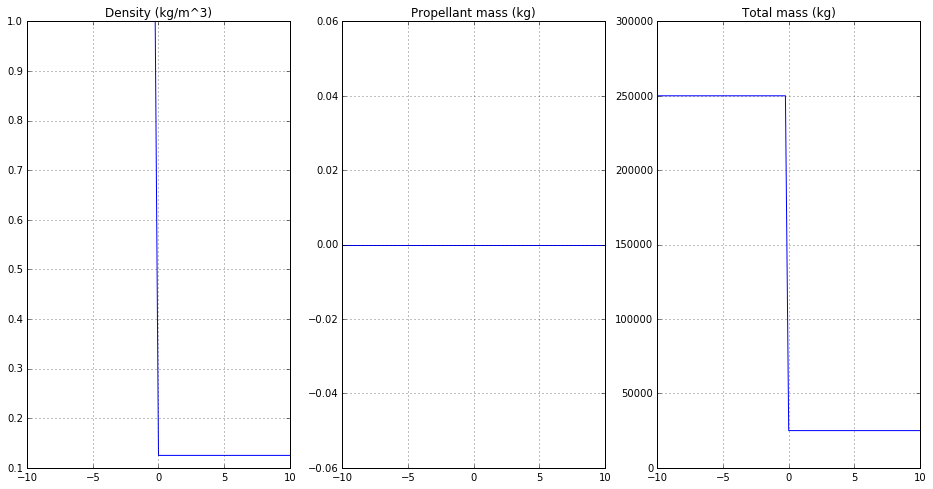

In [3]:
# visualization of the density
pyplot.figure(figsize=(16,8))
pyplot.subplot(131)
pyplot.grid(True)
pyplot.title('Density (kg/m^3)')
pyplot.plot(x,y0[:,0]);

# visualization of density*velocity
pyplot.subplot(132)
pyplot.grid(True)
pyplot.title('Propellant mass (kg)')
pyplot.plot(x,y0[:,1]);

# visualization of densoi
pyplot.subplot(133)
pyplot.grid(True)
pyplot.title('Total mass (kg)')
pyplot.plot(x,y0[:,2]);

In [4]:
# Flux definition
def flux(y):
    u1 = y[:,0]
    u2 = y[:,1]
    u3 = y[:,2]
    f = numpy.zeros([nx,3])
    f[:,0] = u2
    f[:,1] = u2**2/u1 + (gamma-1)*(u3 - 0.5*u2**2/u1)
    f[:,2] = (u3 + (gamma-1)*(u3-0.5*u2**2/u1))*u2/u1
    return f

In [5]:
# Time marching solution
y = numpy.copy(y0)
for it in range(nt-1):
    F = flux(y)
    ym = numpy.roll(y,1,axis=0)
    ym[0,:] = ym[1,:]
    
    yp = numpy.roll(y,-1,axis=0)
    yp[-1,:] = ym[-2,:]
   
    fm = numpy.roll(F,1,axis=0)
    fm[0,:] = fm[1,:]
   
    fp = numpy.roll(F,-1,axis=0)
    fp[-1,:] = fp[-2,:]
   
    ystar_m = 0.5*(ym + y) - dt/(2*dx)*(F - fm)
    ystar_p = 0.5*(yp + y) - dt/(2*dx)*(fp - F)
    y = y - dt/dx*(flux(ystar_p) - flux(ystar_m))

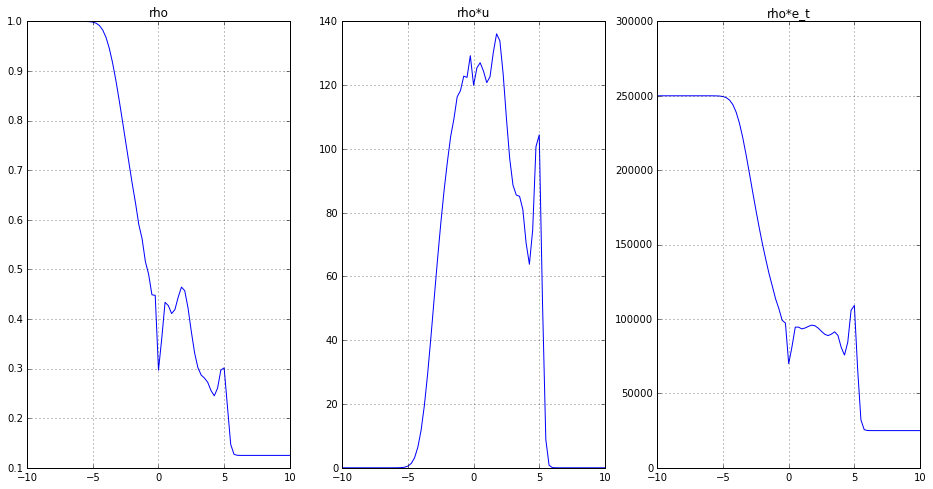

In [6]:
# visualization of the density
pyplot.figure(figsize=(16,8))
pyplot.subplot(131)
pyplot.grid(True)
pyplot.title('rho')
pyplot.plot(x,y[:,0]);

# visualization of density*velocity
pyplot.subplot(132)
pyplot.grid(True)
pyplot.title('rho*u')
pyplot.plot(x,y[:,1]);

# visualization of densoi
pyplot.subplot(133)
pyplot.grid(True)
pyplot.title('rho*e_t')
pyplot.plot(x,y[:,2]);

In [7]:
# Print required output for validation
xtarget = 2.5
ix = numpy.argmin(numpy.absolute(x-xtarget))
rho_at_xtarget = y[ix,0]
V_at_xtarget = y[ix,1]/y[ix,0]
p_at_xtarget = (gamma-1)*(y[ix,2]-0.5*y[ix,1]**2/y[ix,0])

print('Velocity at x=2.5m is','% 0.2f' % V_at_xtarget,'m/s')
print('Pressure at x=2.5m is','% 0.2f' % p_at_xtarget,'N/m²')
print('Density at x=2.5m is','% 0.2f' % rho_at_xtarget,'kg/m³')

Velocity at x=2.5m is  292.61 m/s
Pressure at x=2.5m is  30250.89 N/m²
Density at x=2.5m is  0.37 kg/m³
